In [1]:
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import numpy as np
from fbprophet import Prophet
import pandas as pd
from sklearn.metrics import mean_squared_error


In [9]:
np.version.version


'1.14.0'

In [2]:
data= pd.read_csv('final.csv',usecols=['date','Appliances'])
data = data.set_index(["date"])
from datetime import datetime
data.index = pd.to_datetime(data.index)
train =np.log(data)


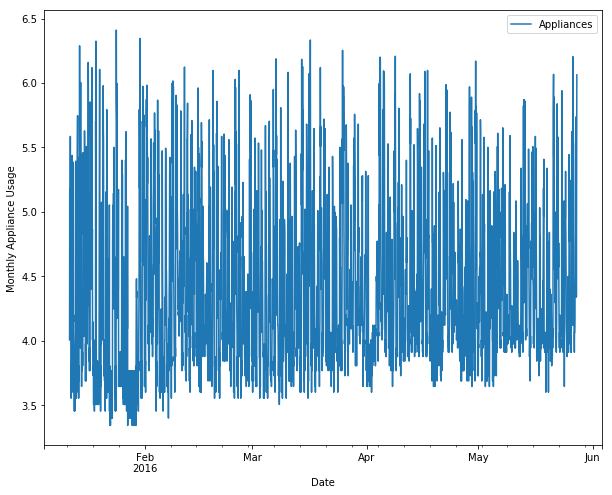

In [3]:
ax = train.plot(figsize=(10, 8))
ax.set_ylabel('Monthly Appliance Usage')
ax.set_xlabel('Date')
plt.show()

In [4]:
prophet_model = Prophet(interval_width=0.95,weekly_seasonality=True)
train_data = train.reset_index()
train_data["ds"] = train_data["date"]
train_data["y"] = train_data["Appliances"]
prophet_model.fit(train_data)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
C:\Users\sonal\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [5]:
future_dates = prophet_model.make_future_dataframe(periods=36, freq='H')
future_dates.tail()

,ds
3321,2016-05-29 02:00:00
3322,2016-05-29 03:00:00
3323,2016-05-29 04:00:00
3324,2016-05-29 05:00:00
3325,2016-05-29 06:00:00


In [6]:
import math
forecast = prophet_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3321,2016-05-29 02:00:00,4.009539,3.112196,4.962437
3322,2016-05-29 03:00:00,3.965309,3.056039,4.877434
3323,2016-05-29 04:00:00,3.953420,2.983379,4.877579
3324,2016-05-29 05:00:00,4.018262,3.061050,5.007289
3325,2016-05-29 06:00:00,4.158816,3.163814,5.141001


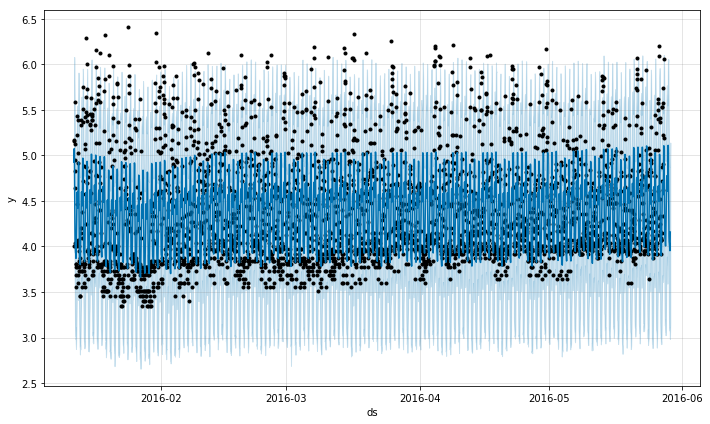

In [7]:
prophet_model.plot(forecast,
              uncertainty=True);

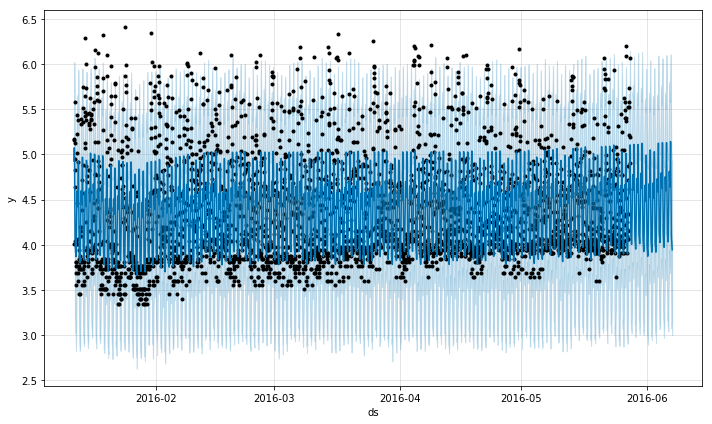

In [8]:
prophet_forecast = prophet_model.make_future_dataframe(periods=250, freq="h")
prophet_forecast = prophet_model.predict(prophet_forecast)
fig1 = prophet_model.plot(prophet_forecast);

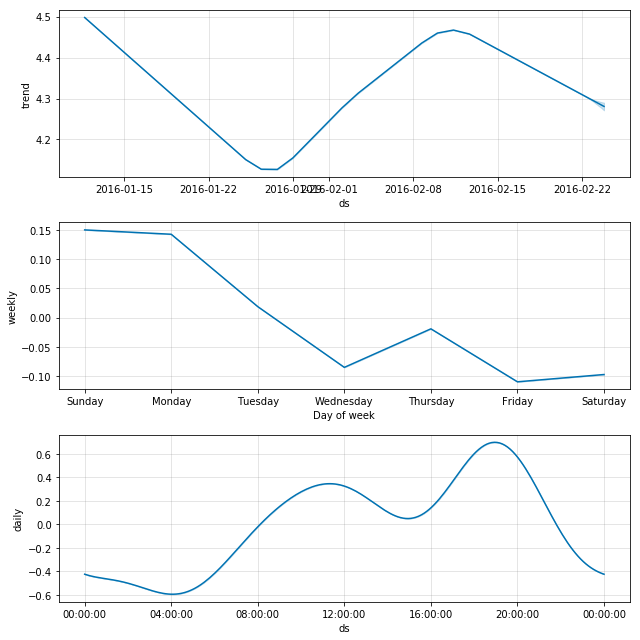

In [50]:
prophet_model.plot_components(forecast);

In [51]:
metric_df = forecast.set_index('ds')[['yhat']].join(train_data.set_index('ds').y).reset_index()
metric_df = metric_df.iloc[0:1035]

In [40]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
r2_score(metric_df.y, metric_df.yhat)

0.3359959658540368

In [41]:
mean_absolute_error(metric_df.y, metric_df.yhat)

0.41735462864474526

In [42]:
mean_squared_error(metric_df.y, metric_df.yhat)

0.3108237014894343